https://wiki.fysik.dtu.dk/gpaw/tutorials/bandstructures/bandstructures.html

In [1]:
%matplotlib inline

In [2]:
import os

In [3]:
os.environ['GPAW_SETUP_PATH'] = os.path.expanduser('~/gpaw-setups-0.9.20000')

In [4]:
from ase.build import bulk
from gpaw import GPAW, PW, FermiDirac

In [5]:
# Perform standard ground state calculation (with plane wave basis)
si = bulk('Si', 'diamond', 5.43)
calc = GPAW(mode=PW(200),
            xc='PBE',
            kpts=(8, 8, 8),
            random=True,  # random guess (needed if many empty bands required)
            occupations=FermiDirac(0.01),
            txt='Si_gs.txt')
si.calc = calc
si.get_potential_energy()
calc.write('Si_gs.gpw')

In [6]:
# Restart from ground state and fix potential:
calc = GPAW('Si_gs.gpw',
            nbands=16,
            fixdensity=True,
            symmetry='off',
            kpts={'path': 'GXWKL', 'npoints': 60},
            convergence={'bands': 8})

calc.get_potential_energy()


  ___ ___ ___ _ _ _  
 |   |   |_  | | | | 
 | | | | | . | | | | 
 |__ |  _|___|_____|  19.8.1
 |___|_|             

User:   jovyan@jupyter-jan-2djanssen-2dgpaw-2dexample-2dpqzidpti
Date:   Tue Apr  7 18:01:16 2020
Arch:   x86_64
Pid:    151
Python: 3.7.3
gpaw:   /srv/conda/envs/notebook/lib/python3.7/site-packages/gpaw
_gpaw:  /srv/conda/envs/notebook/lib/python3.7/site-packages/
        _gpaw.cpython-37m-x86_64-linux-gnu.so
ase:    /srv/conda/envs/notebook/lib/python3.7/site-packages/ase (version 3.18.0)
numpy:  /srv/conda/envs/notebook/lib/python3.7/site-packages/numpy (version 1.17.2)
scipy:  /srv/conda/envs/notebook/lib/python3.7/site-packages/scipy (version 1.3.1)
libxc:  4.3.4
units:  Angstrom and eV
cores:  1

Reading from Si_gs.gpw
Read dipole, energy, free_energy
Reading input parameters:
  kpts: [8 8 8]
  mode: {ecut: 200.0,
         gammacentered: False,
         name: pw}
  occupations: {name: fermi-dirac,
                width: 0.01}
  random: True
  xc: PBE

Initialize

-10.230272532078548

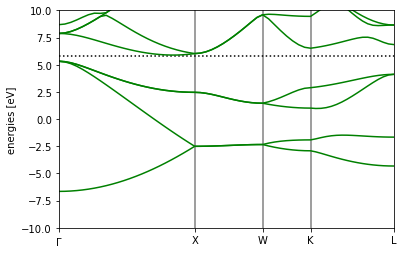

In [7]:
bs = calc.band_structure()
bs.plot(filename='bandstructure.png', show=True, emax=10.0)